<a href="https://colab.research.google.com/github/sukritimahajan35/Parkinson-Detection-Using-Machine-Learning-and-Deep-Learning-/blob/main/DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
#Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Path to the dataset zip file
zip_path = '/content/drive/MyDrive/dataset.zip'

In [ ]:
#Extract the dataset zip file
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt

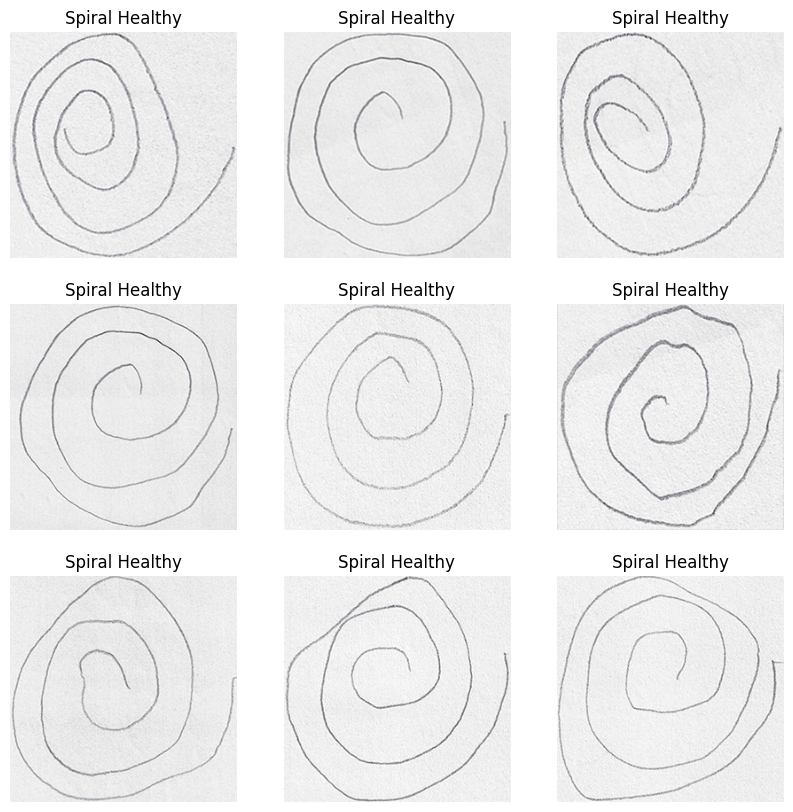

In [ ]:
#Spiral (Healthy)
plt.figure(figsize=(10, 10))
folder_path = "/content/dataset/dataset/spiral/training/healthy/"
for i in range(9):
    plt.subplot(3, 3, i+1)
    img_path = os.path.join(folder_path, os.listdir(folder_path)[i])
    img = load_img(img_path)
    plt.imshow(img)
    plt.title('Spiral Healthy')
    plt.axis('off')
plt.show()

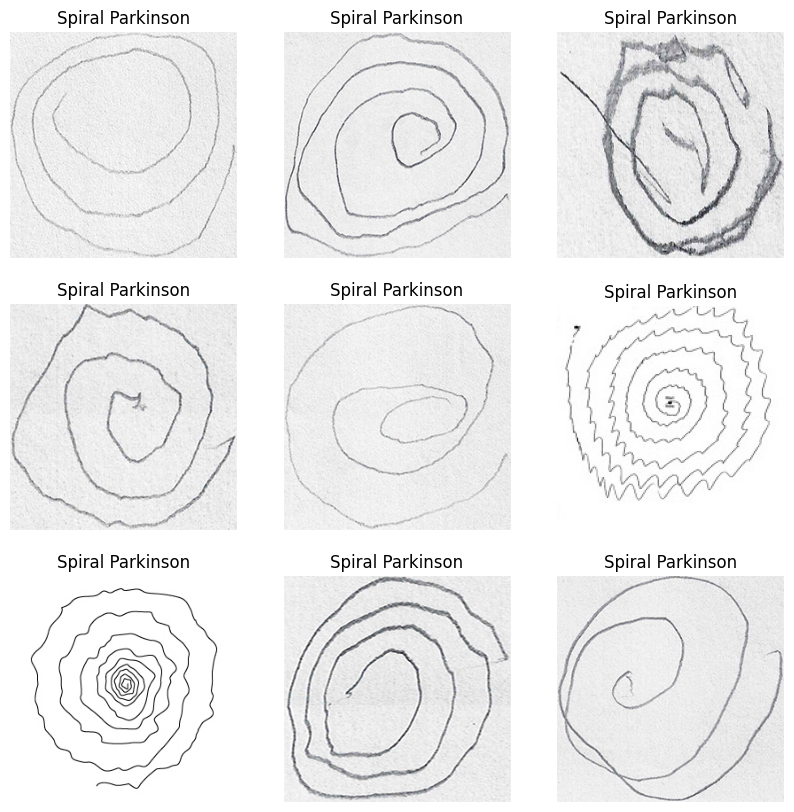

In [ ]:
#Spiral (Parkinson)
plt.figure(figsize=(10, 10))
folder_path = "/content/dataset/dataset/spiral/training/parkinson/"
for i in range(9):
    plt.subplot(3, 3, i+1)
    img_path = os.path.join(folder_path, os.listdir(folder_path)[i])
    img = load_img(img_path)
    plt.imshow(img)
    plt.title('Spiral Parkinson')
    plt.axis('off')
plt.show()

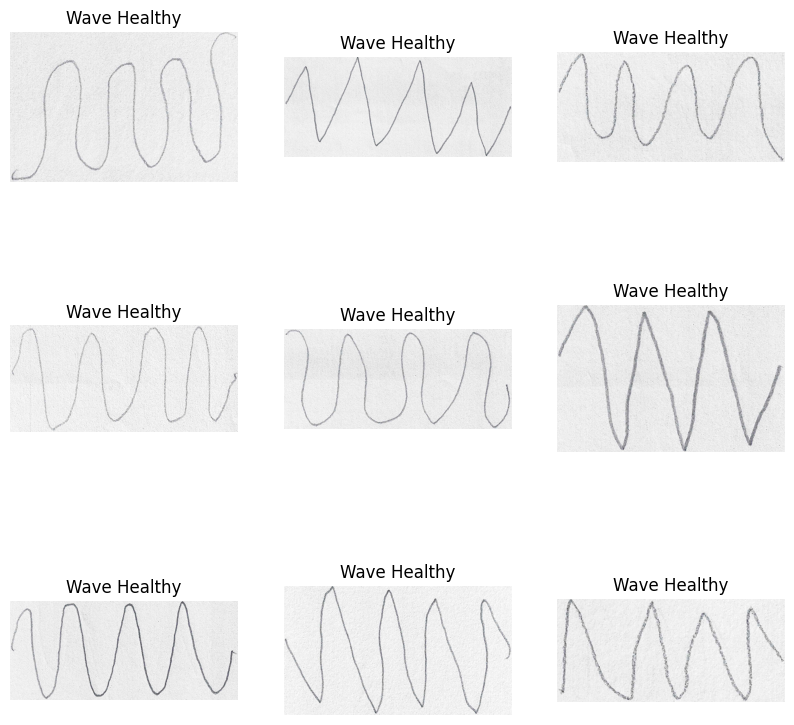

In [ ]:
#Wave (Healthy)
plt.figure(figsize=(10, 10))
folder_path = "/content/dataset/dataset/wave/training/healthy/"
for i in range(9):
    plt.subplot(3, 3, i+1)
    img_path = os.path.join(folder_path, os.listdir(folder_path)[i])
    img = load_img(img_path)
    plt.imshow(img)
    plt.title('Wave Healthy')
    plt.axis('off')
plt.show()

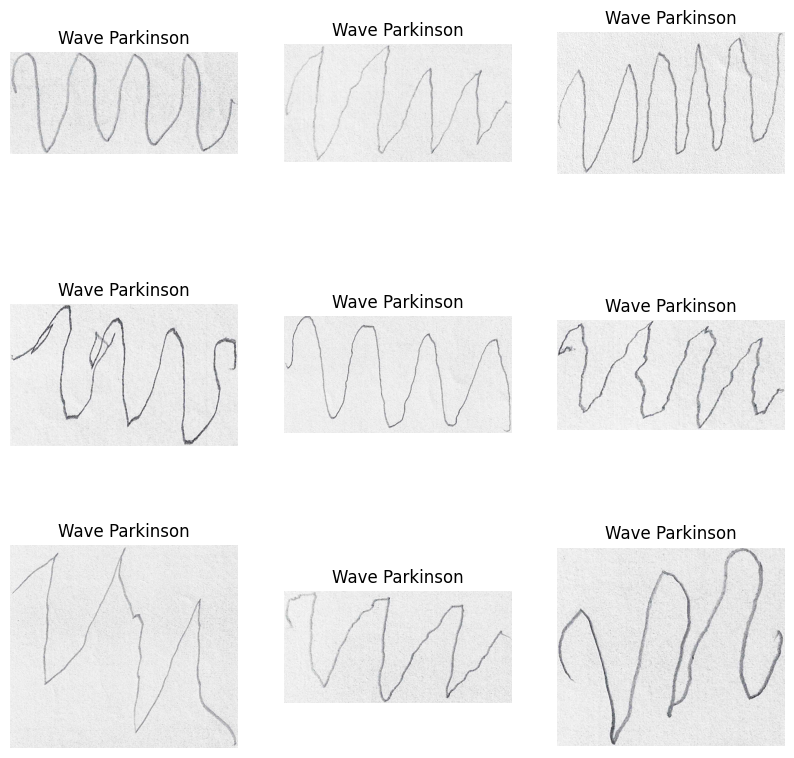

In [ ]:
#Wave (Parkinson)
plt.figure(figsize=(10, 10))
folder_path = "/content/dataset/dataset/wave/training/parkinson/"
for i in range(9):
    plt.subplot(3, 3, i+1)
    img_path = os.path.join(folder_path, os.listdir(folder_path)[i])
    img = load_img(img_path)
    plt.imshow(img)
    plt.title('Wave Parkinson')
    plt.axis('off')
plt.show()

In [ ]:
#Image Data Generation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
spiral_train_generator = train_datagen.flow_from_directory('/content/dataset/dataset/spiral/training/',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

spiral_test_generator = test_datagen.flow_from_directory('/content/dataset/dataset/spiral/testing/',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 77 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
wave_train_generator = train_datagen.flow_from_directory('/content/dataset/dataset/wave/training/',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory('/content/dataset/dataset/wave/testing/',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.applications import MobileNet, InceptionV3
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Function to plot training/validation graphs
def plot_training(history):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [ ]:
# Function to get predictions
def get_predictions(model, test_generator):
    predictions = model.predict(test_generator)
    return np.round(predictions).flatten()

In [ ]:
# Function to plot confusion matrix for each model
def plot_confusion_matrix_for_model(model, test_generator, classes):
    test_generator.reset()
    predictions = get_predictions(model, test_generator)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())
    plot_confusion_matrix(true_classes, predictions, classes=class_labels, title='Confusion Matrix')

In [ ]:
# Define Simple CNN model
def create_simple_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
# Define MobileNet model
def create_mobilenet_model(input_shape):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
# Define Inception model
def create_inception_model(input_shape):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

In [ ]:
# Function to train and evaluate model
def train_and_evaluate_model(model, train_generator, validation_generator, epochs=50):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

    # Evaluate the model
    _, accuracy = model.evaluate(validation_generator)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    # Plot training/validation graphs
    plot_training(history)

    return history

Epoch 1/50
3/3 [==============================] - 7s 1s/step - loss: 1.2539 - accuracy: 0.4675 - val_loss: 0.7123 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 3s 1s/step - loss: 0.7509 - accuracy: 0.4675 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 3s 793ms/step - loss: 0.6857 - accuracy: 0.4935 - val_loss: 0.7001 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 4s 841ms/step - loss: 0.6889 - accuracy: 0.5065 - val_loss: 0.7035 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 5s 2s/step - loss: 0.7723 - accuracy: 0.5195 - val_loss: 0.7428 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 3s 938ms/step - loss: 0.6952 - accuracy: 0.5325 - val_loss: 0.7049 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 3s 1s/step - loss: 0.6856 - accuracy: 0.5195 - val_loss: 0.6954 - val_accuracy: 0.5000
Epoch 8/50
3/3 [================

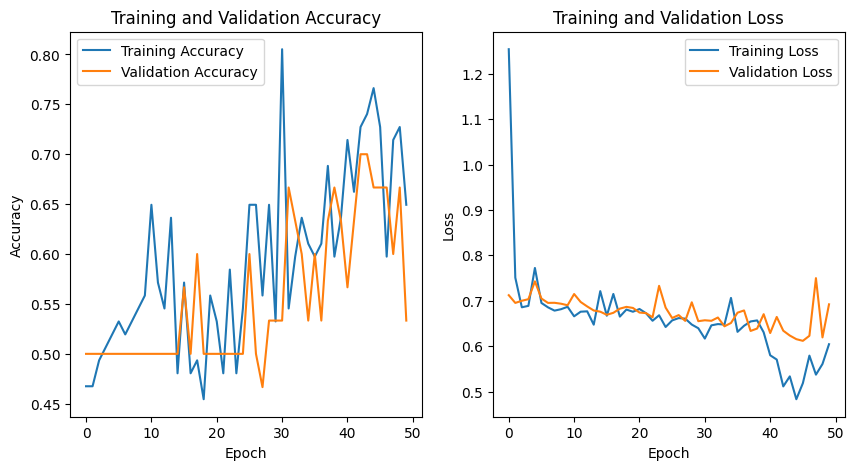

In [ ]:
# Train and evaluate Simple CNN model on spiral dataset
input_shape = (128, 128, 3)
simple_cnn_spiral_model = create_simple_cnn_model(input_shape)
simple_cnn_spiral_history = train_and_evaluate_model(simple_cnn_spiral_model, spiral_train_generator, spiral_test_generator)

1/1 [==============================] - 1s 793ms/step


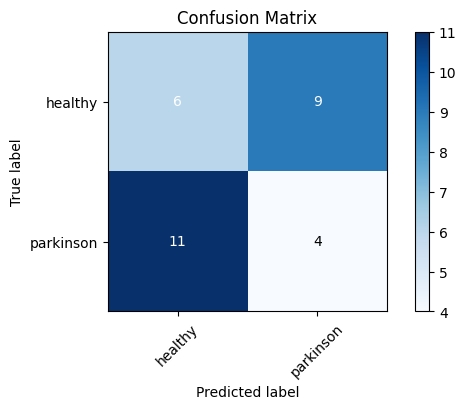

In [ ]:
# Plot confusion matrix for Simple CNN model on spiral dataset
plot_confusion_matrix_for_model(simple_cnn_spiral_model, spiral_test_generator, classes=['Healthy', 'Parkinson'])

17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/50
3/3 [==============================] - 7s 2s/step - loss: 2.8826 - accuracy: 0.6623 - val_loss: 2.7481 - val_accuracy: 0.7667
Epoch 2/50
3/3 [==============================] - 2s 817ms/step - loss: 3.4792 - accuracy: 0.6364 - val_loss: 1.0379 - val_accuracy: 0.7667
Epoch 3/50
3/3 [==============================] - 2s 743ms/step - loss: 1.6252 - accuracy: 0.7403 - val_loss: 1.6640 - val_accuracy: 0.8000
Epoch 4/50
3/3 [==============================] - 2s 485ms/step - loss: 2.3739 - accuracy: 0.7143 - val_loss: 0.8318 - val_accuracy: 0.8000
Epoch 5/50
3/3 [==============================] - 2s 504ms/step - loss: 1.5507 - accuracy: 0.8052 - val_loss: 0.9157 - val_accuracy: 0.7667
Epoch 6/50
3/3 [==============================] - 2s 772ms/step - loss: 1.0285 - accuracy: 0.8182 - val_loss: 1.0178 - val_accuracy: 0.8333
Epoch 7/50
3/3 [==============================] - 3s 833ms/step - loss: 1.1186 - accuracy: 0.8182 

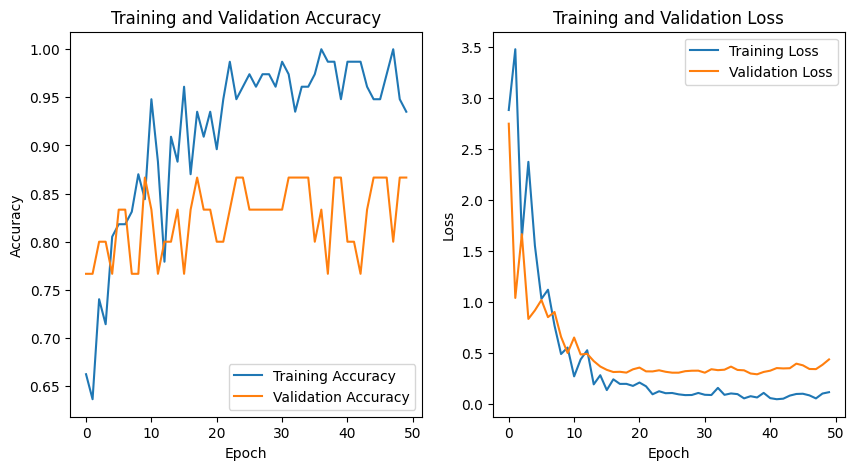

In [ ]:
# Train and evaluate MobileNet model on spiral dataset
mobilenet_spiral_model = create_mobilenet_model(input_shape)
mobilenet_spiral_history = train_and_evaluate_model(mobilenet_spiral_model, spiral_train_generator, spiral_test_generator)

1/1 [==============================] - 2s 2s/step


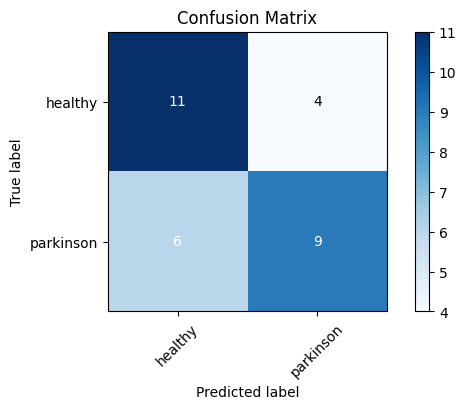

In [ ]:
# Plot confusion matrix for MobileNet model on spiral dataset
plot_confusion_matrix_for_model(mobilenet_spiral_model, spiral_test_generator, classes=['Healthy', 'Parkinson'])

87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/50
3/3 [==============================] - 11s 2s/step - loss: 3.5636 - accuracy: 0.5065 - val_loss: 1.4648 - val_accuracy: 0.6000
Epoch 2/50
3/3 [==============================] - 6s 2s/step - loss: 1.5597 - accuracy: 0.6623 - val_loss: 1.7438 - val_accuracy: 0.7333
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: 2.5440 - accuracy: 0.6883 - val_loss: 1.3593 - val_accuracy: 0.8000
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 1.4025 - accuracy: 0.7403 - val_loss: 0.9312 - val_accuracy: 0.7000
Epoch 5/50
3/3 [==============================] - 6s 2s/step - loss: 0.9566 - accuracy: 0.7792 - val_loss: 1.9679 - val_accuracy: 0.7333
Epoch 6/50
3/3 [==============================] - 5s 2s/step - loss: 1.6071 - accuracy: 0.7273 - val_loss: 0.9831 - val_accuracy: 0.8000
Epoch 7/50
3/3 [==============================] - 6s 2s/step - loss: 1.1791 - accuracy: 0.7143 - val_loss: 0.563

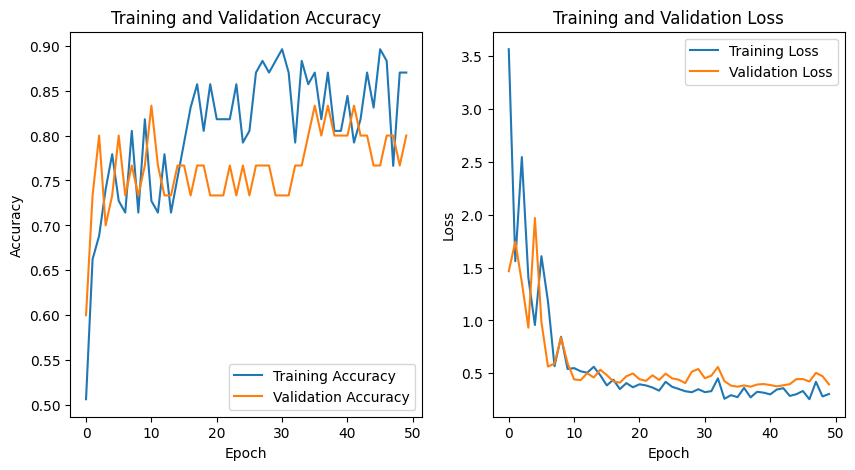

In [ ]:
# Train and evaluate Inception model on spiral dataset
inception_spiral_model = create_inception_model(input_shape)
inception_spiral_history = train_and_evaluate_model(inception_spiral_model, spiral_train_generator, spiral_test_generator)

1/1 [==============================] - 3s 3s/step


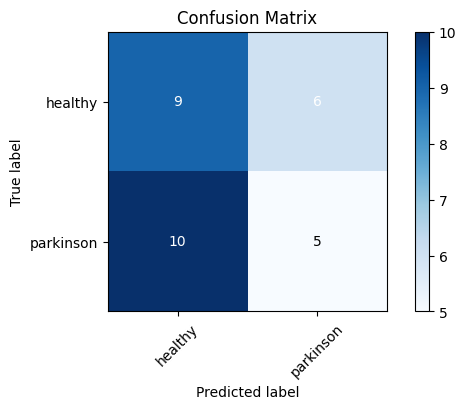

In [ ]:
# Plot confusion matrix for Inception model on spiral dataset
plot_confusion_matrix_for_model(inception_spiral_model, spiral_test_generator, classes=['Healthy', 'Parkinson'])

Epoch 1/50
3/3 [==============================] - 6s 1s/step - loss: 1.4220 - accuracy: 0.5417 - val_loss: 0.8675 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 3s 754ms/step - loss: 0.8006 - accuracy: 0.4306 - val_loss: 0.7108 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 3s 1s/step - loss: 0.6941 - accuracy: 0.5417 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 3s 874ms/step - loss: 0.6920 - accuracy: 0.5833 - val_loss: 0.7007 - val_accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 3s 750ms/step - loss: 0.6859 - accuracy: 0.5139 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 0.6954 - accuracy: 0.5417 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 3s 750ms/step - loss: 0.6978 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/50
3/3 [=============

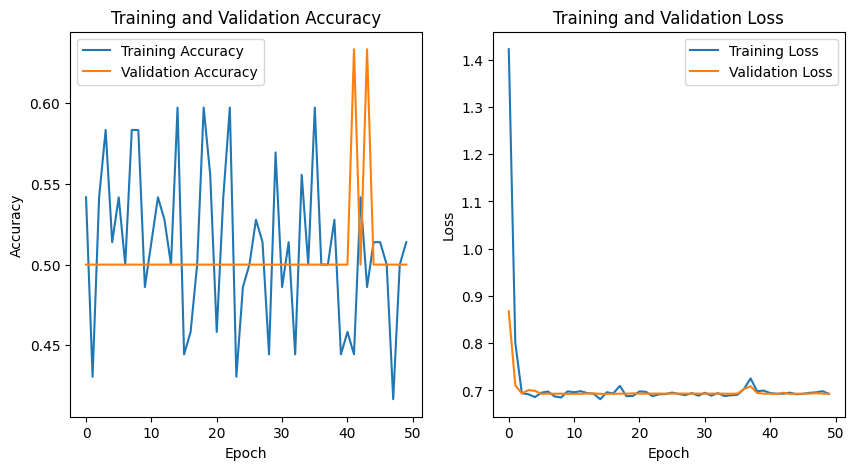

In [ ]:
# Train and evaluate Simple CNN model on wave dataset
simple_cnn_wave_model = create_simple_cnn_model(input_shape)
simple_cnn_wave_history = train_and_evaluate_model(simple_cnn_wave_model, wave_train_generator, wave_test_generator)

1/1 [==============================] - 0s 472ms/step


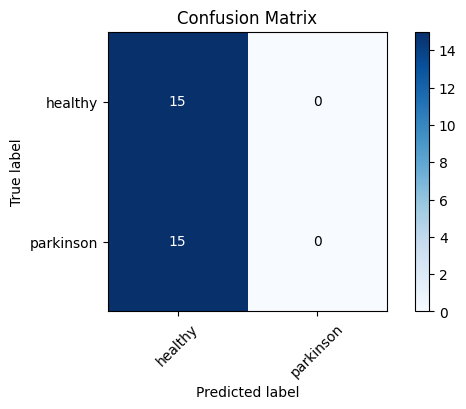

In [ ]:
# Plot confusion matrix for Simple CNN model on wave dataset
plot_confusion_matrix_for_model(simple_cnn_wave_model, wave_test_generator, classes=['Healthy', 'Parkinson'])

Epoch 1/50
3/3 [==============================] - 5s 865ms/step - loss: 5.0668 - accuracy: 0.5000 - val_loss: 0.6726 - val_accuracy: 0.6667
Epoch 2/50
3/3 [==============================] - 2s 575ms/step - loss: 2.3285 - accuracy: 0.5417 - val_loss: 0.9178 - val_accuracy: 0.7667
Epoch 3/50
3/3 [==============================] - 4s 2s/step - loss: 2.1661 - accuracy: 0.6806 - val_loss: 0.6198 - val_accuracy: 0.8333
Epoch 4/50
3/3 [==============================] - 2s 503ms/step - loss: 1.1202 - accuracy: 0.7361 - val_loss: 0.5577 - val_accuracy: 0.7667
Epoch 5/50
3/3 [==============================] - 2s 489ms/step - loss: 0.8236 - accuracy: 0.7222 - val_loss: 0.3651 - val_accuracy: 0.8333
Epoch 6/50
3/3 [==============================] - 2s 497ms/step - loss: 0.8123 - accuracy: 0.8056 - val_loss: 0.5607 - val_accuracy: 0.8333
Epoch 7/50
3/3 [==============================] - 2s 510ms/step - loss: 1.1195 - accuracy: 0.7361 - val_loss: 0.3234 - val_accuracy: 0.9000
Epoch 8/50
3/3 [=======

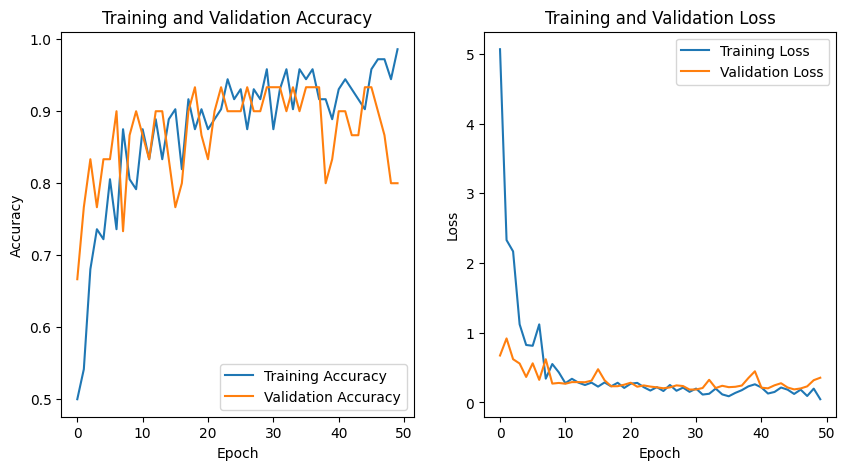

In [ ]:
# Train and evaluate MobileNet model on wave dataset
mobilenet_wave_model = create_mobilenet_model(input_shape)
mobilenet_wave_history = train_and_evaluate_model(mobilenet_wave_model, wave_train_generator, wave_test_generator)

1/1 [==============================] - 1s 870ms/step


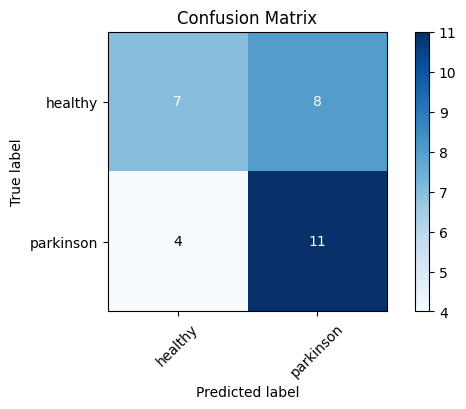

In [ ]:
# Plot confusion matrix for MobileNet model on wave dataset
plot_confusion_matrix_for_model(mobilenet_wave_model, wave_test_generator, classes=['Healthy', 'Parkinson'])

Epoch 1/50
3/3 [==============================] - 13s 3s/step - loss: 2.0855 - accuracy: 0.5278 - val_loss: 2.4699 - val_accuracy: 0.6000
Epoch 2/50
3/3 [==============================] - 3s 1s/step - loss: 2.4757 - accuracy: 0.6528 - val_loss: 1.4474 - val_accuracy: 0.6000
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: 2.7146 - accuracy: 0.6111 - val_loss: 1.5122 - val_accuracy: 0.8000
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 3.0921 - accuracy: 0.6528 - val_loss: 1.0436 - val_accuracy: 0.8333
Epoch 5/50
3/3 [==============================] - 3s 1s/step - loss: 1.0260 - accuracy: 0.7222 - val_loss: 0.6368 - val_accuracy: 0.7333
Epoch 6/50
3/3 [==============================] - 3s 1s/step - loss: 1.4540 - accuracy: 0.6944 - val_loss: 0.8621 - val_accuracy: 0.8333
Epoch 7/50
3/3 [==============================] - 5s 2s/step - loss: 1.1800 - accuracy: 0.7778 - val_loss: 0.9383 - val_accuracy: 0.8000
Epoch 8/50
3/3 [========================

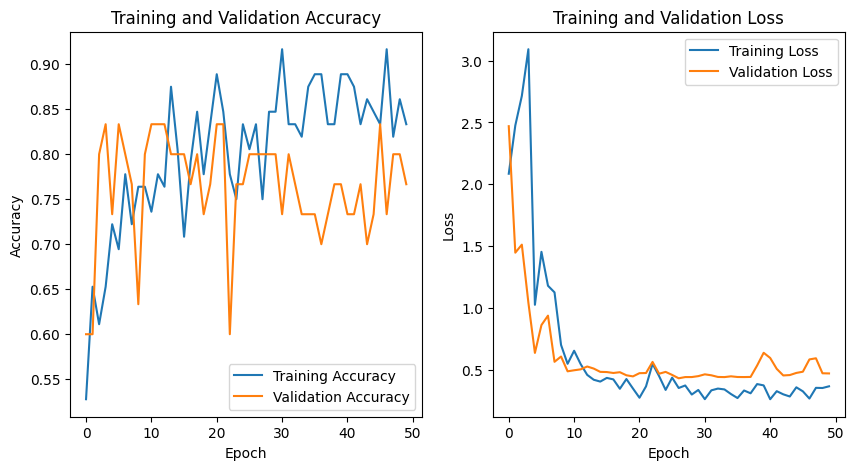

In [ ]:
# Train and evaluate Inception model on wave dataset
inception_wave_model = create_inception_model(input_shape)
inception_wave_history = train_and_evaluate_model(inception_wave_model, wave_train_generator, wave_test_generator)

1/1 [==============================] - 8s 8s/step


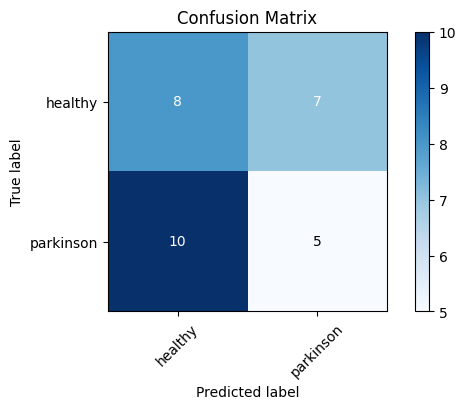

In [ ]:
# Plot confusion matrix for Inception model on wave dataset
plot_confusion_matrix_for_model(inception_wave_model, wave_test_generator, classes=['Healthy', 'Parkinson'])